##### 1) Importing the Libraries

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#### 2) Loading the Dataset

In [129]:
housing_df = pd.read_csv('Housing.csv')

#### 3) Understanding the dataset

In [130]:
housing_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [131]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


#### 4) Data Cleaning/Data Transformstion

In [132]:
# Convert binary categorical variables ('yes'/'no') to numerical format (1/0)
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
housing_df[binary_cols] = housing_df[binary_cols].apply(lambda x: x.map({'yes': 1, 'no': 0}))
housing_df


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished


In [133]:
# Handle 'furnishingstatus' using one-hot encoding
furnishing_status_dummies = pd.get_dummies(housing_df['furnishingstatus'], drop_first=True, dtype=int)

# Add the new dummy columns to the dataframe and drop the original
housing_df = pd.concat([housing_df, furnishing_status_dummies], axis=1)
housing_df.drop('furnishingstatus', axis=1, inplace=True)
housing_df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0


In [134]:
# Scale the numerical features using StandardScaler
scaler = StandardScaler()
numeric_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
housing_df[numeric_cols] = scaler.fit_transform(housing_df[numeric_cols])
housing_df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,4.566365,1.046726,1.403419,1.421812,1.378217,1,0,0,0,1,1.517692,1,0,0
1,4.004484,1.757010,1.403419,5.405809,2.532024,1,0,0,0,1,2.679409,0,0,0
2,4.004484,2.218232,0.047278,1.421812,0.224410,1,0,1,0,0,1.517692,1,1,0
3,3.985755,1.083624,1.403419,1.421812,0.224410,1,0,1,0,1,2.679409,1,0,0
4,3.554979,1.046726,1.403419,-0.570187,0.224410,1,1,1,0,1,1.517692,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,-1.576868,-0.991879,-1.308863,-0.570187,-0.929397,1,0,1,0,0,1.517692,0,0,1
541,-1.605149,-1.268613,0.047278,-0.570187,-0.929397,0,0,0,0,0,-0.805741,0,1,0
542,-1.614327,-0.705921,-1.308863,-0.570187,-0.929397,1,0,0,0,0,-0.805741,0,0,1
543,-1.614327,-1.033389,0.047278,-0.570187,-0.929397,0,0,0,0,0,-0.805741,0,0,0


#### 5) Splitting into Training Data and Test Data

In [135]:
y = housing_df.pop('price')
X = housing_df

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [137]:
# Print the shapes of the resulting datasets to confirm the split
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (436, 13)
Shape of X_test: (109, 13)
Shape of y_train: (436,)
Shape of y_test: (109,)


#### 6) Creating a model

In [138]:
print("\n--- Training the Linear Regression Model ---")
# Create an instance of the Linear Regression model
lr_model = LinearRegression()
print("Linear Regression model instance created.")


--- Training the Linear Regression Model ---
Linear Regression model instance created.


In [139]:
# Fit the model to the training data (learn the coefficients)
lr_model.fit(X_train, y_train)
print("Model training complete.")

Model training complete.


#### 7) Model Evaluation

In [140]:
print("\n--- Evaluating the Model ---")

# First, make predictions on both the training data and testing data
y_pred_train = lr_model.predict(X_train)
print("Predictions generated for the training set.")
y_pred_test = lr_model.predict(X_test)
print("Predictions generated for the test set.")


--- Evaluating the Model ---
Predictions generated for the training set.
Predictions generated for the test set.


In [141]:
# --- Model Performance on Training Set ---
print("\n--- Model Performance on Training Set ---")
mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)


--- Model Performance on Training Set ---


In [142]:
print(f"Mean Absolute Error (MAE): {mae_train:.4f}")
print(f"Mean Squared Error (MSE): {mse_train:.4f}")
print(f"R-squared (R²): {r2_train:.4f}")

Mean Absolute Error (MAE): 0.3849
Mean Squared Error (MSE): 0.2773
R-squared (R²): 0.6859


In [143]:
# --- Model Performance on Test Set ---
print("\n--- Model Performance on Test Set ---")
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)



--- Model Performance on Test Set ---


In [144]:
print(f"Mean Absolute Error (MAE): {mae_test:.4f}")
print(f"Mean Squared Error (MSE): {mse_test:.4f}")
print(f"R-squared (R²): {r2_test:.4f}")


Mean Absolute Error (MAE): 0.5191
Mean Squared Error (MSE): 0.5024
R-squared (R²): 0.6529


#### 9) Plot regression line and interpret coefficients.


--- Visualizing and Interpreting the Model ---


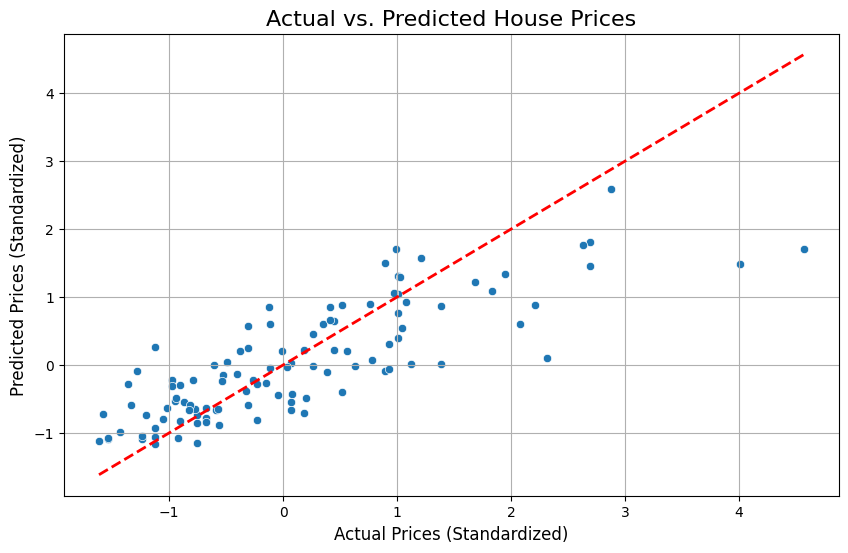

In [145]:
print("\n--- Visualizing and Interpreting the Model ---")

# --- 1. Plotting the Regression Line (Actual vs. Predicted) ---
# Create a scatter plot of the actual vs. predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_test)
plt.title('Actual vs. Predicted House Prices', fontsize=16)
plt.xlabel('Actual Prices (Standardized)', fontsize=12)
plt.ylabel('Predicted Prices (Standardized)', fontsize=12)
# Add a line for perfect predictions (y=x)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2)
plt.grid(True)
plt.show()


*Conclusion from the Plot: The points on your plot form a relatively tight, linear cluster around the red line. This is a visual confirmation of your good R² score (0.65). It shows that while there are some errors (points are not perfectly on the line), there is a strong positive correlation between the actual and predicted prices. The model is clearly capturing the underlying trend in the data.*

In [146]:
# --- 2. Interpreting the Coefficients ---
# Create a DataFrame to view the coefficients for each feature
coefficients_df = pd.DataFrame(lr_model.coef_, X.columns, columns=['Coefficient'])

print("\n--- Model Coefficients ---")
print("These values show how much the standardized price is expected to change for a one-unit change in the feature's value.")
print(coefficients_df)

print("\n--- Intercept ---")
print(f"The model's intercept is: {lr_model.intercept_:.4f}")


--- Model Coefficients ---
These values show how much the standardized price is expected to change for a one-unit change in the feature's value.
                 Coefficient
area                0.273778
bedrooms            0.030296
bathrooms           0.294009
stories             0.188984
mainroad            0.196883
guestroom           0.123940
basement            0.208833
hotwaterheating     0.366373
airconditioning     0.423512
parking             0.103570
prefarea            0.337070
semi-furnished     -0.067898
unfurnished        -0.221352

--- Intercept ---
The model's intercept is: -0.4090


*The model's coefficients show that premium amenities like air conditioning and a preferred location are the most significant drivers of house prices, even more so than the physical area. Conversely, a house being unfurnished is the strongest negative factor, substantially lowering its predicted value compared to a furnished one.*

#### 10) Conclusion

Successful Model Implementation: This project successfully implemented a multiple linear regression model to predict house prices, following a standard machine learning workflow from data preprocessing to model evaluation and interpretation.

Effective Data Preprocessing: The initial data required significant preprocessing. Categorical features like 'mainroad' and 'furnishingstatus' were converted into numerical formats (binary and one-hot encoding) to make them usable by the model.

Importance of Feature Scaling: All numerical features, including the target variable price, were standardized using StandardScaler. This best-practice step ensured that features with vastly different scales (e.g., area vs. bedrooms) were treated equally by the model, leading to a more stable and reliable training process.

Robust Model Evaluation: The data was split into 80% for training and 20% for testing. This allowed for a robust evaluation of the model's ability to generalize to new, unseen data.

Good Predictive Performance: The model achieved an R-squared (R²) of 0.65 on the test data, indicating that it can explain approximately 65% of the variance in house prices. This is a solid result, confirming a strong relationship between the selected features and the price.

No Significant Overfitting: The R² score on the training data (0.68) was very close to the test data score (0.65). This small difference demonstrates that the model generalizes well and is not simply "memorizing" the training data, making it a reliable predictive tool.

Key Price Drivers Identified: Interpretation of the model's coefficients revealed that premium features had the strongest positive impact on price. Air conditioning, hot water heating, and a preferred area location were the most influential factors.

Insightful Feature Importance: The analysis showed that while the total area of a house is a strong predictor, the number of bedrooms had a surprisingly small impact on price once the area was accounted for. This suggests the market values overall space more than how that space is partitioned.

Negative Factors Quantified: The model also quantified negative influencers. A house being unfurnished had the largest negative coefficient, significantly lowering its predicted value compared to a furnished or semi-furnished home.

Actionable Insights: The final model provides clear and actionable insights, confirming that a house's value is driven not just by its size but significantly by its modern amenities and location.